1. ECG-data (3 points)
Read a dataset from an ecg-measurement:

1) Make a line-plot with time (column 'ts') on the x-axis and ecg (column 'ecg') on the y-axis.

2) Edit the timestamps so that they are in seconds from the beginning of the measurement (ie reduce all ts values by the first timestamp). The 'ts' column is already measured in seconds so no other conversions are required. 

3) To make sure that the data really looks like what ECG data should look like, plot in a separate figure just the first 30 seconds.

In [107]:
# read dataset ecg.csv
import numpy as np
ecg = np.genfromtxt("data/ecg.csv", names=True, delimiter=",")

Text(0.5, 1.0, 'ECG singal over time')

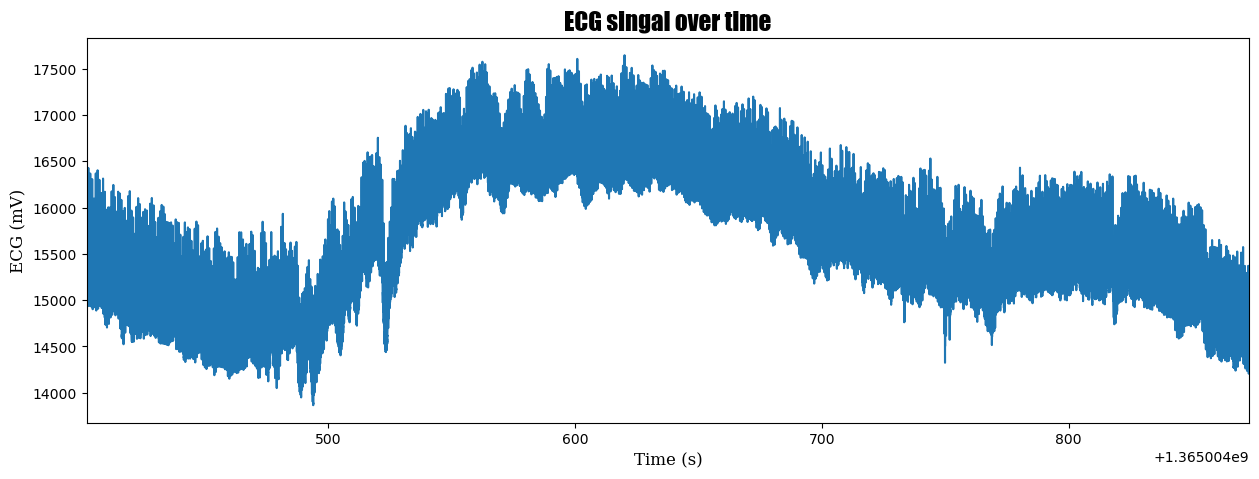

In [108]:
# Plot the data
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 5))
plt.plot(ecg["ts"], ecg["ecg"])
plt.xlim(min(ecg['ts']), max(ecg['ts']))
plt.xlabel("Time (s)", fontname = "serif", fontsize = 12)
plt.ylabel("ECG (mV)", fontname = "serif", fontsize = 12)
plt.title("ECG singal over time", fontname = "fantasy", fontsize = 18)

In [109]:
ecg['ts']

array([1.36500440e+09, 1.36500440e+09, 1.36500440e+09, ...,
       1.36500487e+09, 1.36500487e+09, 1.36500487e+09])

Text(0.5, 1.0, 'ECG singal over time')

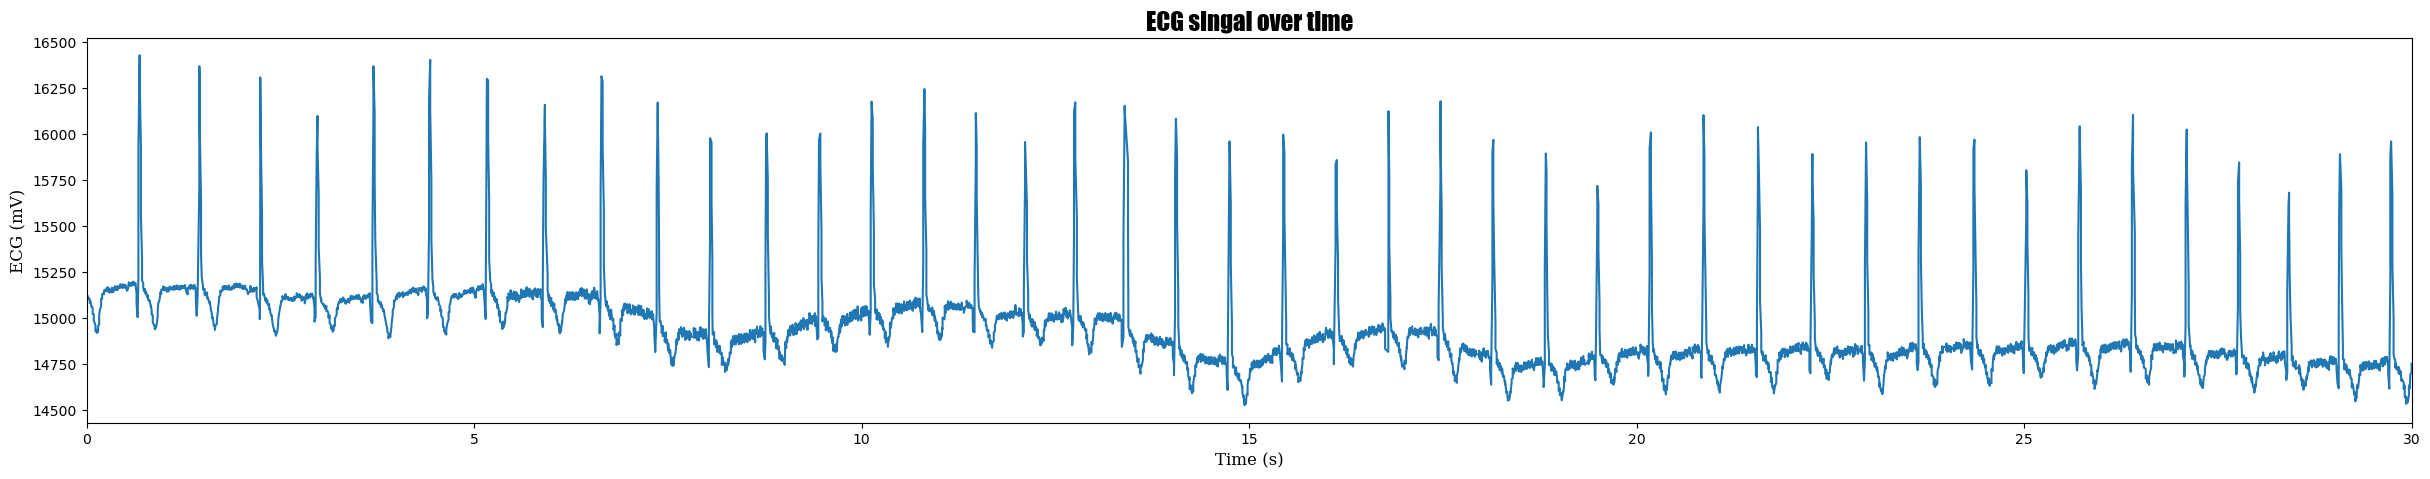

In [110]:
# Edit the timestamps so that they are in seconds from the beginning of the measurement (ie reduce all ts values by the first timestamp). The 'ts' column is already measured in seconds so no other conversions are required. 
ecg["ts"] = ecg["ts"] - ecg["ts"][0]
ecg_30s = ecg[ecg["ts"]<30]
# Plot the first 30 seconds of the data
plt.figure(figsize = (30,5))
plt.plot(ecg_30s["ts"], ecg_30s["ecg"])
plt.xlim(0,30)
plt.xlabel("Time (s)", fontname = "serif", fontsize = 12)
plt.ylabel("ECG (mV)", fontname = "serif", fontsize = 12)
plt.title("ECG singal over time", fontname = "fantasy", fontsize = 18)

2. ECG filtering (3 points)
The signal clearly has a lot of low frequency (i.e. slow) "ripples" but we're mostly interested in high frequency (i.e. fast) changes that indicate the heart rate (each 'spike' in the signal = one beat of the heart). We can get the rippling separated from the signal with low pass filtering (i.e. filtering the data with a kind of a sliding average). There are many possible ways to extract the low frequency part of the signal but let's use a mean/uniform filter for now.

Calculate the low frequency component by calling the function scipy.ndimage.uniform_filter (import scipy.ndimage). The function takes the data and the size of the window over which we average over as arguments. Looking at the data, 0.5 seconds would seem like a good time window to average over, but do note that sampling rate for the data is 128 Hz and the window size is given to the function as the number of samples to average over. 

Finally, separate the high frequency part of the signal by subtracting the low-frequency portion from the original signal (high_freq_component = original_signal - filtered_signal). Plot these frequency components into separate figures.


In [111]:
def ecg_plot(ecg, method):
#parse the method name and get the method string
    function = eval(method)
    method = method.split(".")[1]
    method = method.split("_")[0]
# calculate the low frequncy component
    ecg_0tohalf = ecg[(ecg["ts"] < 0.5) & (ecg["ts"] > 0)]
    import scipy.ndimage as nd
    ecg_filtered = function(ecg["ecg"], (ecg_0tohalf.shape[0])) 
    high_freq_component = ecg["ecg"] - ecg_filtered
# plot the low frequency component
    plt.figure(figsize=(30, 5))
    plt.plot(ecg["ts"], ecg_filtered)
    plt.xlim(min(ecg['ts']), max(ecg['ts']))
    plt.xlabel("Time (s)", fontname="serif", fontsize=12)
    plt.ylabel("ECG (mV)", fontname="serif", fontsize=12)
    plt.title(f"Low frequncy ECG singal component over time by {method} filter" ,
    fontname="fantasy", fontsize=18)
# plot the high frequency component
    plt.figure(figsize = (30,5))
    plt.plot(ecg["ts"], high_freq_component)
    plt.xlim(min(ecg['ts']), max(ecg['ts']))
    plt.xlabel("Time (s)", fontname = "serif", fontsize = 12)
    plt.ylabel("ECG (mV)", fontname = "serif", fontsize = 12)
    plt.title(f"High frequncy ECG singal component over time by {method}filter", fontname = "fantasy", fontsize = 18)

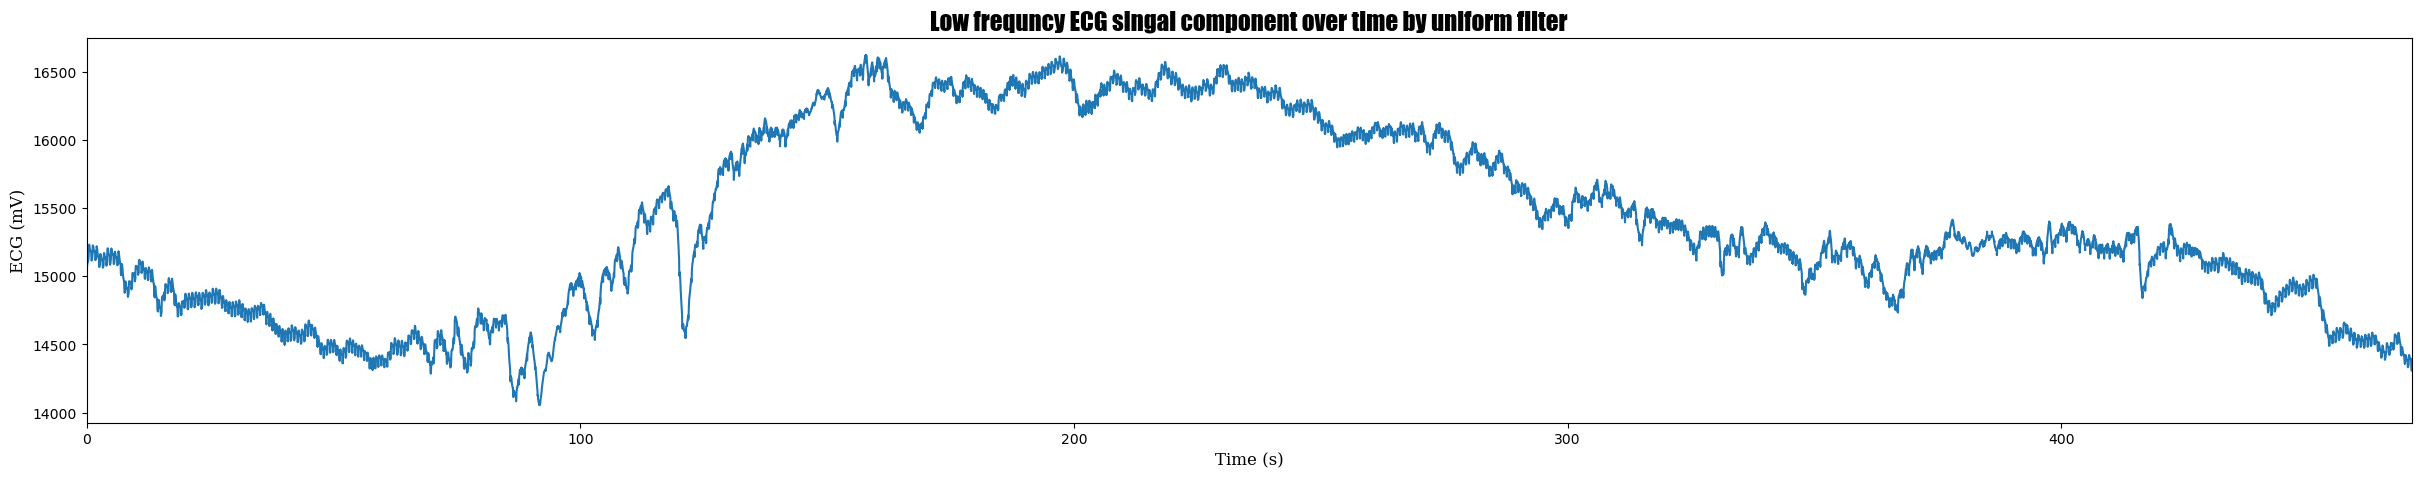

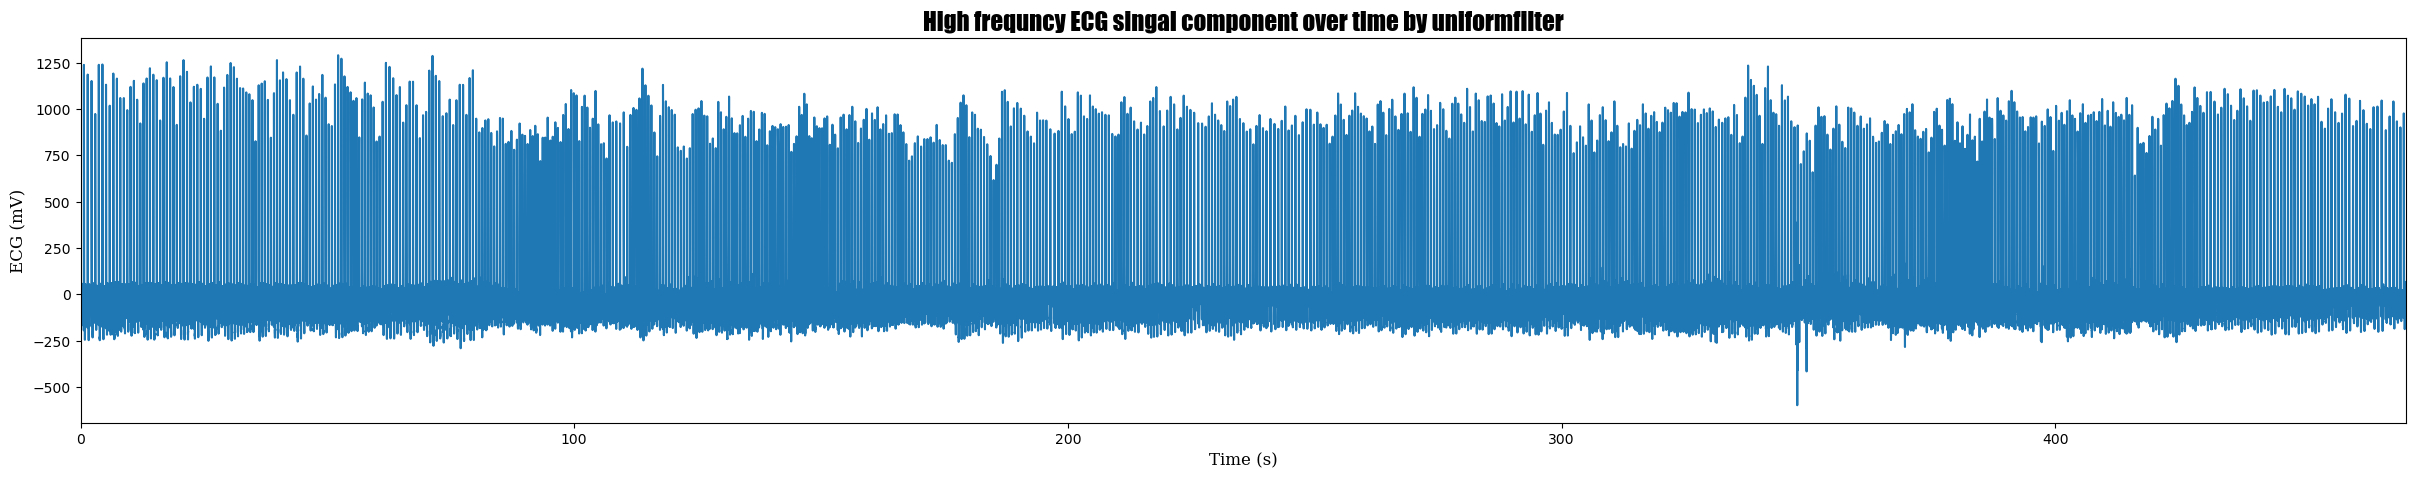

In [112]:
ecg_plot(ecg, "nd.uniform_filter")

3. ECG filtering (now with median and Gaussian filters) (3 points)
A) Do the same exercise as above but now with a median filter. Use the (approximately) same 0.5 second time window and plot the low- and high-frequency components to separate figures.

B) Do the same exercise as above again but now with a Gaussian filter. Conceptually, the Gaussian filter is similar to the mean filter, but more distant values get weighted less and nearby values more according to a Gaussian distribution. Use the same window as in the previous tasks as the sigma of the Gaussian filter (the function works exactly the same way as the two previous ones, give data as the first argument in the function call and sigma as the second).

Are there any major differences in the resulting signals between the three filters?


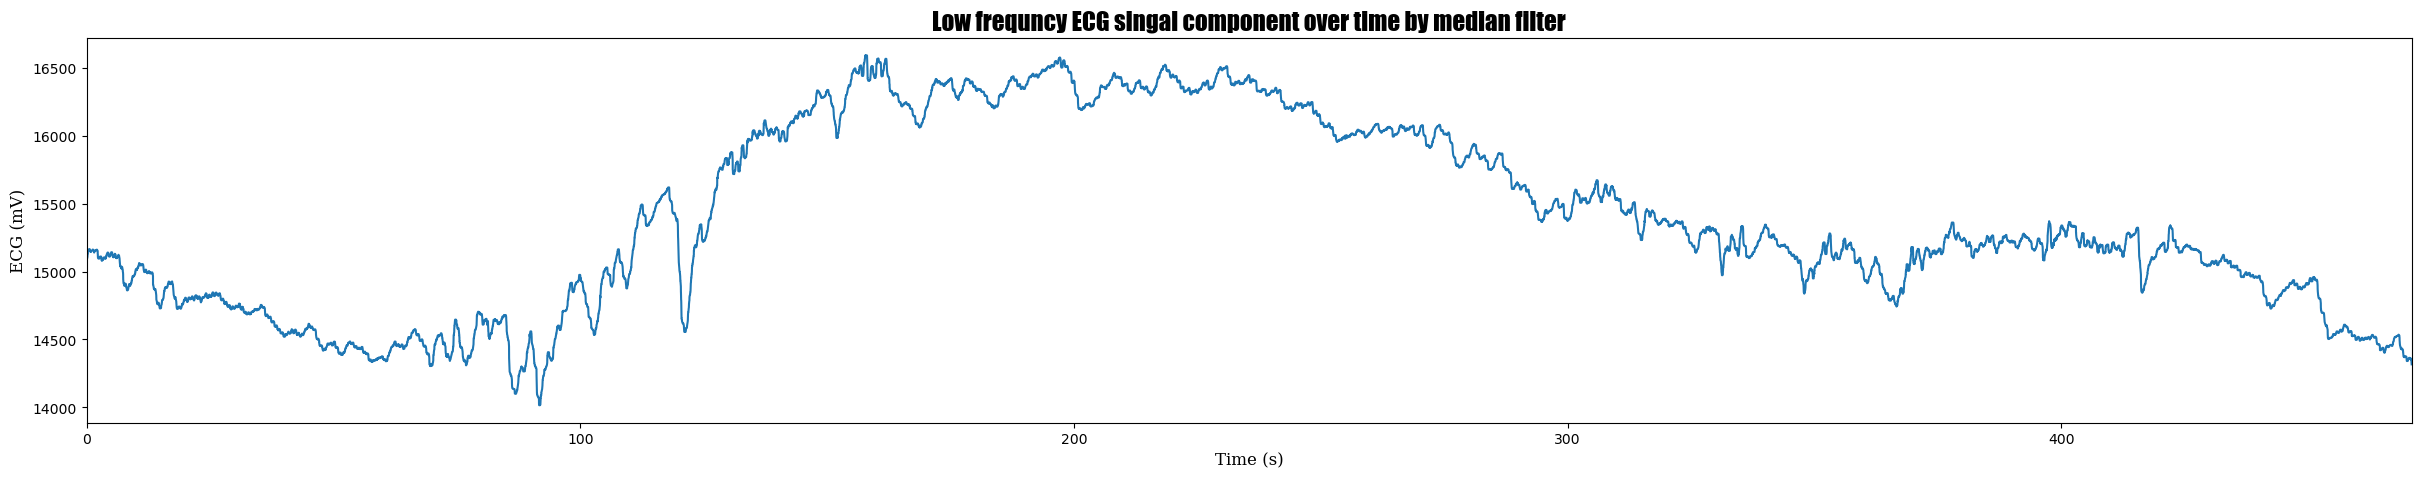

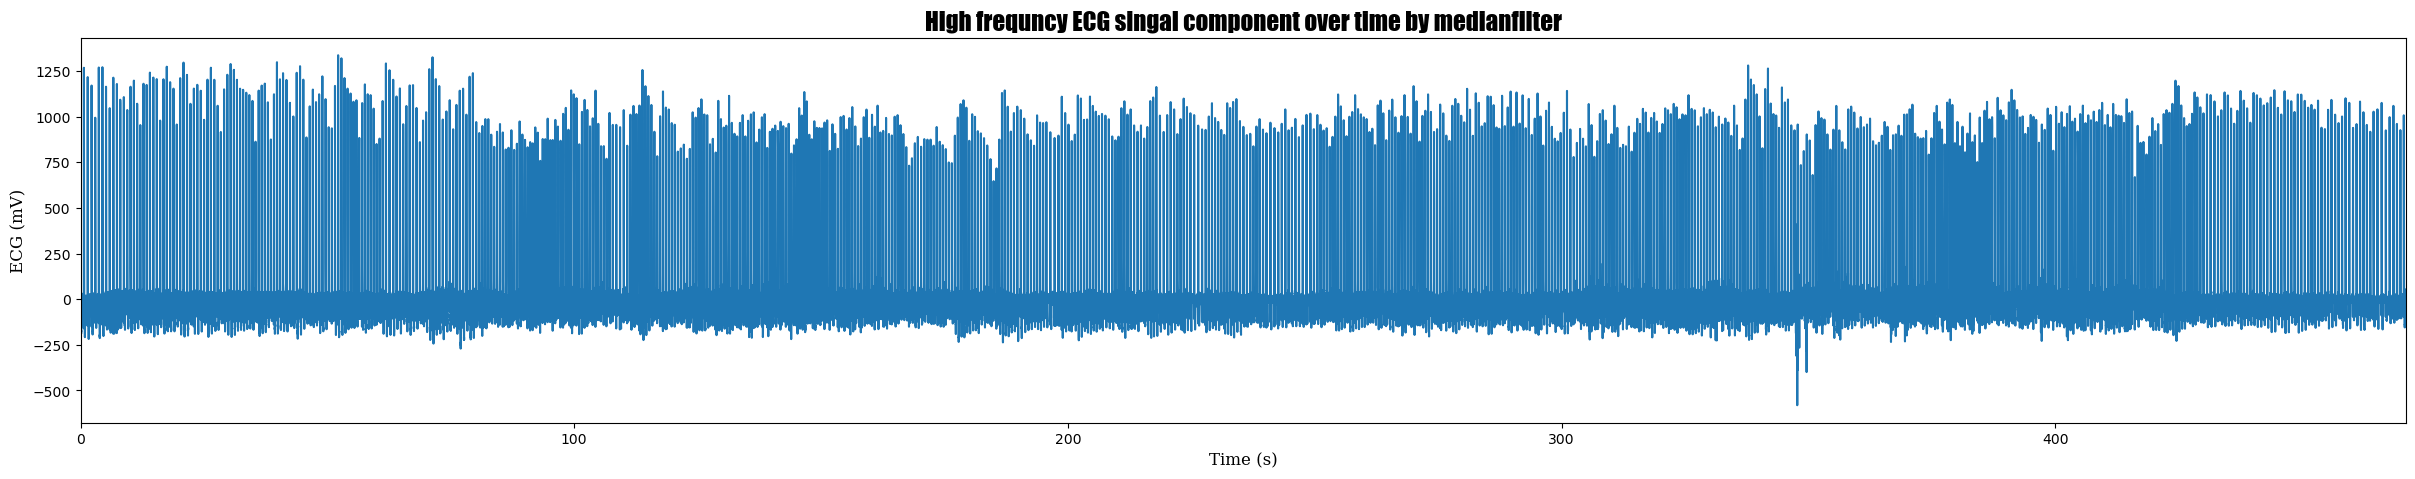

In [113]:
ecg_plot(ecg, "nd.median_filter")

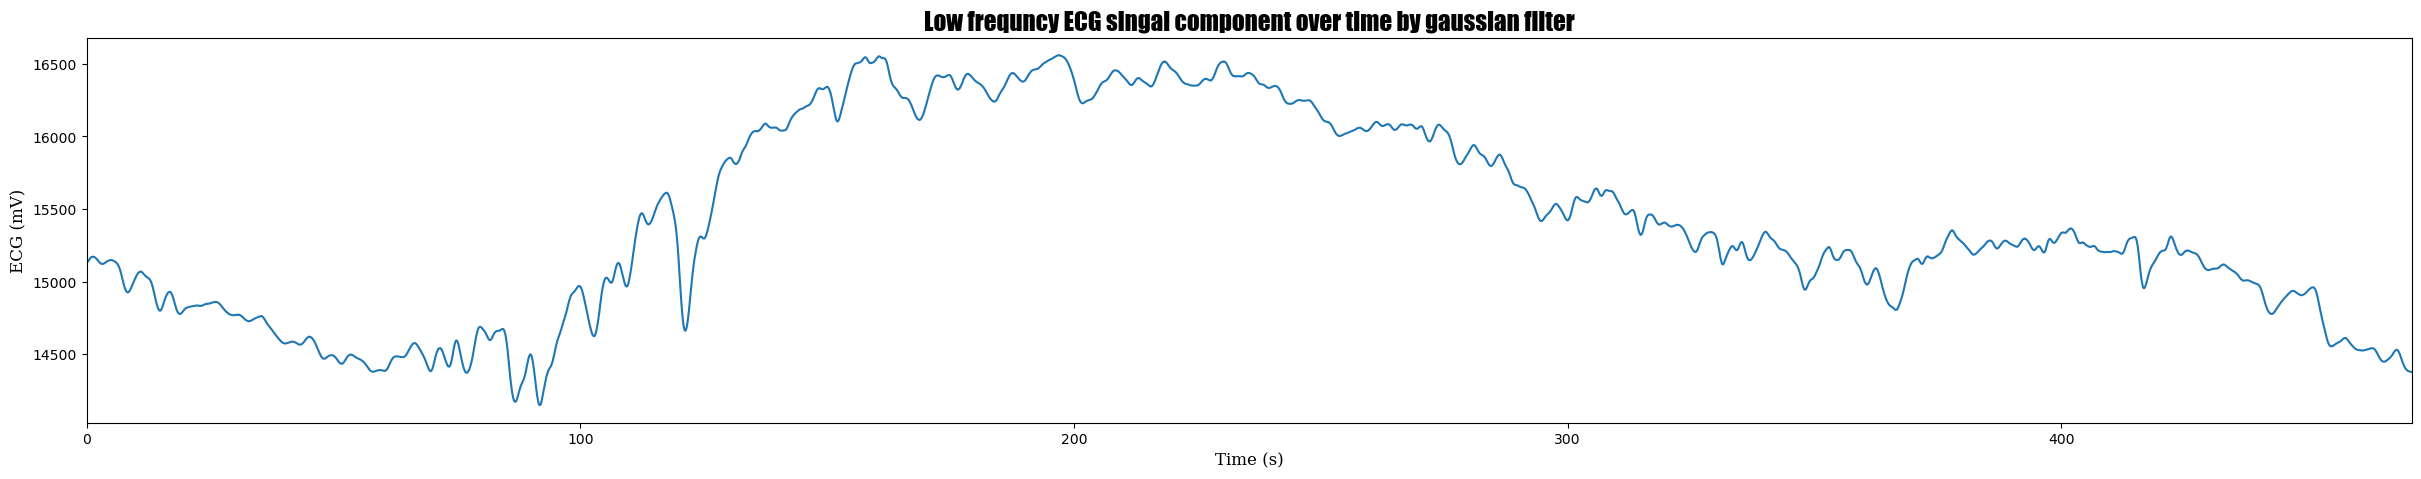

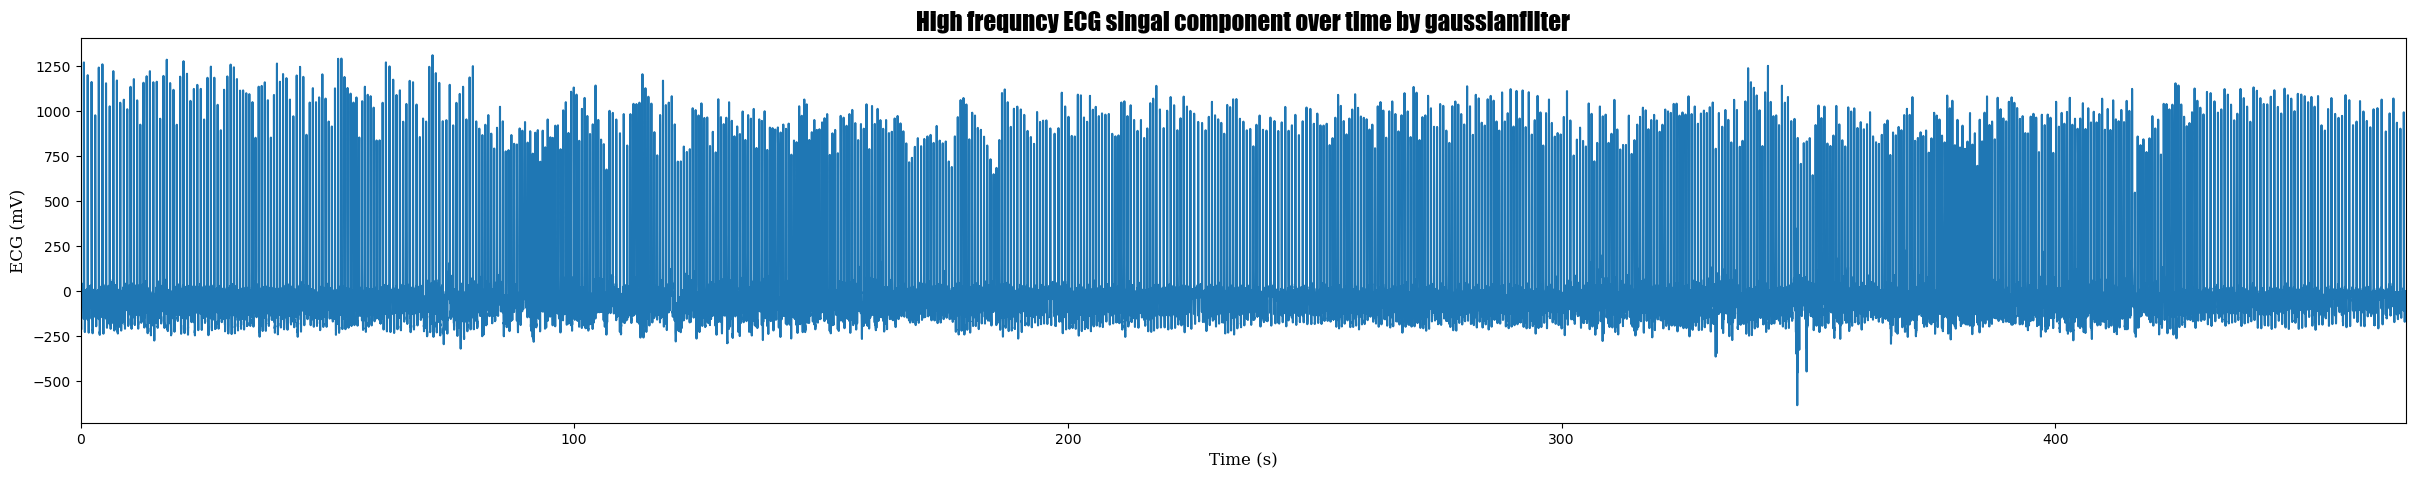

In [114]:
ecg_plot(ecg, "nd.gaussian_filter")

4. Interpolating over missing values (3 points)
Download the file  partial_signal.csv. The file contains two columns: time and x. The signal x has several missing values. Estimate what those values might by using linear interpolation, quadratic interpolation and cubic interpolation. Plot all three results to the same figure.

Hint: Save the original signal. Remove the observation where x is NaN (np.isfinite function will return a boolean array with True/False values depending on if value is a finite number or not) and make a interpolator function with scipy.interpolate.interp1d and interpolate a new signal by using the original time values.

In [119]:
# read the data
import numpy as np
signal = np.genfromtxt("data/partial_signal.csv", names = True, delimiter = ",")

In [125]:
#estimate the missing values of singal x by using linear interpolation
def linear_interpolation(signal):
    import numpy as np
    # get the index of missing values
    missing_index = np.where(np.isnan(signal["x"]))[0]
    # get the index of non-missing values
    non_missing_index = np.where(~np.isnan(signal["x"]))[0]
    # get the non-missing values
    non_missing_values = signal["x"][non_missing_index]
    # get the missing values
    missing_values = signal["x"][missing_index]
    # get the missing timestamps
    missing_ts = signal["time"][missing_index]
    # get the non-missing timestamps
    non_missing_ts = signal["time"][non_missing_index]
    # get the missing values by using linear interpolation
    from scipy.interpolate import interp1d
    f = interp1d(non_missing_ts, non_missing_values)
    missing_values = f(missing_ts)
    # replace the missing values by the estimated values
    signal["x"][missing_index] = missing_values
    return signal

a = linear_interpolation(signal)

In [126]:
a

array([( 0.        ,  0.        ), ( 0.12693304,  0.12659245),
       ( 0.25386607,  0.25114799), ( 0.38079911,  0.37166246),
       ( 0.50773215,  0.48619674), ( 0.63466518,  0.59290793),
       ( 0.76159822,  0.69007901), ( 0.88853126,  0.77614646),
       ( 1.01546429,  0.84972543), ( 1.14239733,  0.909632  ),
       ( 1.26933037,  0.95490224), ( 1.3962634 ,  0.98480775),
       ( 1.52319644,  0.99886734), ( 1.65012947,  0.99685478),
       ( 1.77706251,  0.97880245), ( 1.90399555,  0.94500082),
       ( 2.03092858,  0.89599377), ( 2.15786162,  0.83256985),
       ( 2.28479466,  0.75574957), ( 2.41172769,  0.666769  ),
       ( 2.53866073,  0.59053486), ( 2.66559377,  0.51430072),
       ( 2.7925268 ,  0.43806659), ( 2.91945984,  0.36183245),
       ( 3.04639288,  0.28559832), ( 3.17332591,  0.20936418),
       ( 3.30025895,  0.13313004), ( 3.42719199,  0.05689591),
       ( 3.55412502, -0.01933823), ( 3.68105806, -0.09557236),
       ( 3.8079911 , -0.1718065 ), ( 3.93492413, -0.248